### Write a python program for Electricity-Generation-Analysis-and-Prediction-in-India by Linear regression

# Importing libraries

- Importing important libraries such as numpy, pandas, matplotlib etc.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings('ignore')

# Reading dataset

- Changing datatype of 'Date' column from string to Date type
- Resetting Index

In [79]:
power=pd.read_csv("energygen.csv",parse_dates=['Date'])

In [80]:
power.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [81]:
power=power.set_index('index')

In [82]:
power.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
index,,,,,,,,
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


# Exploratory Data Analysis

- Extracting basic information about the dataset 

In [83]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4945 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4945 non-null   datetime64[ns]
 1   Region                                4945 non-null   object        
 2   Thermal Generation Actual (in MU)     4945 non-null   object        
 3   Thermal Generation Estimated (in MU)  4945 non-null   object        
 4   Nuclear Generation Actual (in MU)     2967 non-null   float64       
 5   Nuclear Generation Estimated (in MU)  2967 non-null   float64       
 6   Hydro Generation Actual (in MU)       4945 non-null   float64       
 7   Hydro Generation Estimated (in MU)    4945 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 347.7+ KB


- Since 'Thermal Generation Actual (in MU)' and 'Thermal Generation Estimated (in MU)' are float values but cosidered as object by default (due to presence of commas[,])  these have to be changed to float datatypes

In [84]:
power['Thermal Generation Actual (in MU)'] = power['Thermal Generation Actual (in MU)'].str.replace(',','').astype('float')
power['Thermal Generation Estimated (in MU)'] = power['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')

In [85]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4945 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4945 non-null   datetime64[ns]
 1   Region                                4945 non-null   object        
 2   Thermal Generation Actual (in MU)     4945 non-null   float64       
 3   Thermal Generation Estimated (in MU)  4945 non-null   float64       
 4   Nuclear Generation Actual (in MU)     2967 non-null   float64       
 5   Nuclear Generation Estimated (in MU)  2967 non-null   float64       
 6   Hydro Generation Actual (in MU)       4945 non-null   float64       
 7   Hydro Generation Estimated (in MU)    4945 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 347.7+ KB


In [86]:
power.describe()

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,4945.000000,4945.000000,2967.000000,2967.000000,4945.000000,4945.000000
mean,603.978358,575.395116,37.242208,36.987877,73.305921,76.842965
std,383.534208,383.387299,15.883968,11.491292,74.482145,82.043952
min,12.340000,12.380000,0.000000,0.000000,0.000000,0.000000
25%,470.050000,427.460000,26.140000,30.190000,26.910000,23.310000
50%,615.280000,535.980000,30.720000,34.840000,52.960000,50.270000
75%,689.530000,672.740000,46.830000,43.075000,85.940000,95.800000
max,1395.970000,1442.380000,68.740000,76.640000,348.720000,397.380000


In [87]:
power.isna().sum()

Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

## Heatmap indicating null values in the Dataset

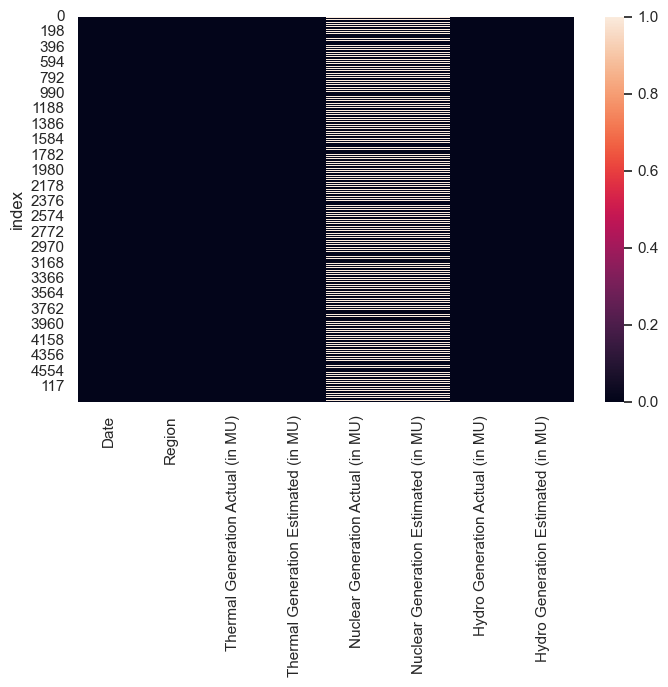

In [88]:
plt.figure(figsize=(8,5))
plt.show(sns.heatmap(power.isnull()))

- Since there are no Nuclear Energy Generation plants in Eastern and North-Eastern region, values for them are missing.
- These missing values can be replaced with 0 since no energy was generated in that area.

In [89]:
power=power.fillna(0)

In [90]:
power.Region.unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

## Correlation between different features

In [91]:
a=power.corr() 
a

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
Thermal Generation Actual (in MU),1.000000,0.980072,0.474167,0.583776,0.136598,0.145290
Thermal Generation Estimated (in MU),0.980072,1.000000,0.413791,0.521211,0.102277,0.092564
Nuclear Generation Actual (in MU),0.474167,0.413791,1.000000,0.876772,0.260189,0.273817
Nuclear Generation Estimated (in MU),0.583776,0.521211,0.876772,1.000000,0.327767,0.333217
Hydro Generation Actual (in MU),0.136598,0.102277,0.260189,0.327767,1.000000,0.960589
Hydro Generation Estimated (in MU),0.145290,0.092564,0.273817,0.333217,0.960589,1.000000


<AxesSubplot:>

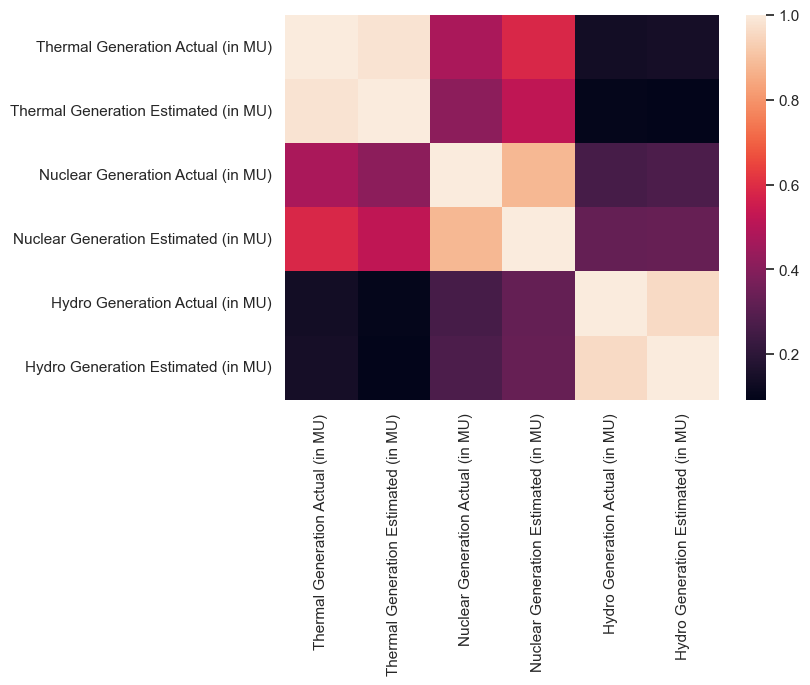

In [92]:
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(a)

- Thermal energy turns out to be the most dominant power generated all over the country.

## Calculating total Actual and Estimated Powers

In [93]:
power['Total Actual Power']=power['Thermal Generation Actual (in MU)']+power['Nuclear Generation Actual (in MU)']+power['Hydro Generation Actual (in MU)']
power['Total Estimated Power']=power['Thermal Generation Estimated (in MU)']+power['Nuclear Generation Estimated (in MU)']+power['Hydro Generation Estimated (in MU)']

In [94]:
power.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Power,Total Estimated Power
index,,,,,,,,,,
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,927.86,840.59
1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,1204.06,1049.67
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,750.96,693.13
3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,526.96,498.75
4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,53.75,37.12


The graph indicates that maximum power is generated in the Western region followed by the Northern and then the Southern region.

- The graph indicates that maximum power is generated in the Western region followed by the Northern and then the Southern region.

## Calculating Power Generation grouped by Month

In [95]:
power_month = power[['Date','Total Actual Power','Total Estimated Power']]
power_month['Month']=power_month['Date'].dt.month
power_month

,Date,Total Actual Power,Total Estimated Power,Month
index,,,,
0,2017-09-01,927.86,840.59,9
1,2017-09-01,1204.06,1049.67,9
2,2017-09-01,750.96,693.13,9
3,2017-09-01,526.96,498.75,9
4,2017-09-01,53.75,37.12,9
...,...,...,...,...
305,2020-08-01,1045.07,978.35,8
306,2020-08-01,1213.04,1319.01,8
307,2020-08-01,649.98,519.06,8


In [96]:
power_month['Month'] = power_month['Month'].apply(lambda x: calendar.month_abbr[int(x)])

In [97]:
power_month

,Date,Total Actual Power,Total Estimated Power,Month
index,,,,
0,2017-09-01,927.86,840.59,Sep
1,2017-09-01,1204.06,1049.67,Sep
2,2017-09-01,750.96,693.13,Sep
3,2017-09-01,526.96,498.75,Sep
4,2017-09-01,53.75,37.12,Sep
...,...,...,...,...
305,2020-08-01,1045.07,978.35,Aug
306,2020-08-01,1213.04,1319.01,Aug
307,2020-08-01,649.98,519.06,Aug


In [98]:
power_month = power_month.groupby('Month').agg('sum')
power_month.reset_index(inplace=True)
power_month

,Month,Total Actual Power,Total Estimated Power
0,Apr,213513.05,212048.02
1,Aug,222086.50,209302.58
2,Dec,308104.51,295469.50
3,Feb,291998.90,283755.93
4,Jan,316118.41,304111.42
5,Jul,324230.03,315703.55
6,Jun,333726.56,313241.10
7,Mar,276712.36,267485.50
8,May,227504.28,226703.85
9,Nov,299675.62,287673.20


In [99]:
power_month['Month'] = pd.Categorical(power_month.Month,categories=calendar.month_abbr[1:], ordered=True)
power_month=power_month.sort_values('Month')
power_month.reset_index(drop=True, inplace=True)
power_month

,Month,Total Actual Power,Total Estimated Power
0,Jan,316118.41,304111.42
1,Feb,291998.90,283755.93
2,Mar,276712.36,267485.50
3,Apr,213513.05,212048.02
4,May,227504.28,226703.85
5,Jun,333726.56,313241.10
6,Jul,324230.03,315703.55
7,Aug,222086.50,209302.58
8,Sep,322081.33,309785.40
9,Oct,323916.84,309780.29


## Month-wise Estimated Vs. Actual Power Generation

<AxesSubplot:xlabel='Month'>

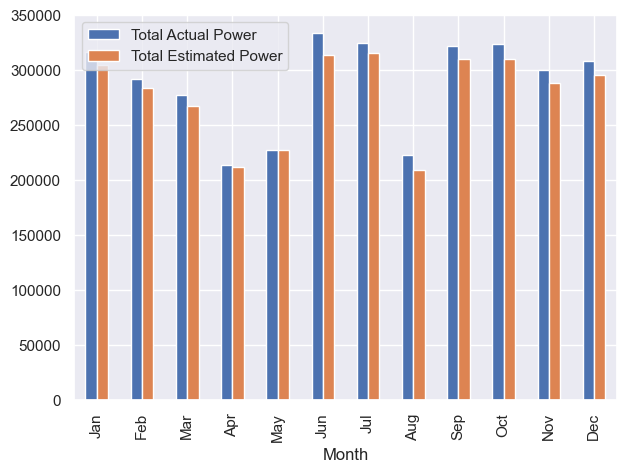

In [100]:
power_month.plot(kind='bar',x='Month',y=['Total Actual Power','Total Estimated Power'])

### Analysis of model on overall dataset grouping by date



*   Importing libraries required for Regression model and splitting the data into train and test set



In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.linear_model import LinearRegression

In [102]:
mean_power = power.groupby(by='Date',as_index=False).mean()
mean_power

,Date,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Power,Total Estimated Power
0,2017-09-01,555.582,506.478,23.652,17.836,113.484,99.538,692.718,623.852
1,2017-09-02,555.582,512.674,23.652,18.456,113.484,99.128,692.718,630.258
2,2017-09-03,555.554,506.646,23.652,18.514,113.484,94.610,692.690,619.770
3,2017-09-04,555.554,542.856,23.652,18.524,113.484,100.072,692.690,661.452
4,2017-09-05,558.170,555.930,23.652,18.542,113.484,94.032,695.306,668.504
...,...,...,...,...,...,...,...,...,...
984,2020-07-28,592.326,597.208,26.216,17.864,105.154,117.900,723.696,732.972
985,2020-07-29,592.326,583.772,26.216,18.056,105.154,113.962,723.696,715.790
986,2020-07-30,594.872,576.776,26.216,17.128,105.154,113.956,726.242,707.860
987,2020-07-31,596.800,588.622,26.216,17.134,105.154,115.826,728.170,721.582


## Linear Regression Model for Hydro Energy Generated

In [103]:
mean_hydro = mean_power[['Hydro Generation Estimated (in MU)','Hydro Generation Actual (in MU)']]
mean_hydro

,Hydro Generation Estimated (in MU),Hydro Generation Actual (in MU)
0,99.538,113.484
1,99.128,113.484
2,94.610,113.484
3,100.072,113.484
4,94.032,113.484
...,...,...
984,117.900,105.154
985,113.962,105.154
986,113.956,105.154
987,115.826,105.154


<AxesSubplot:>

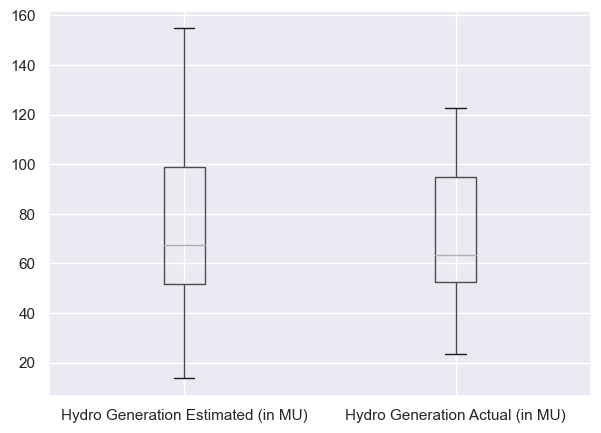

In [104]:
mean_hydro.boxplot()

* Creating the training and testing data for linear regression

In [105]:
x = mean_hydro[['Hydro Generation Estimated (in MU)']].values
y = mean_hydro[['Hydro Generation Actual (in MU)']].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred = linreg.predict(x_test)

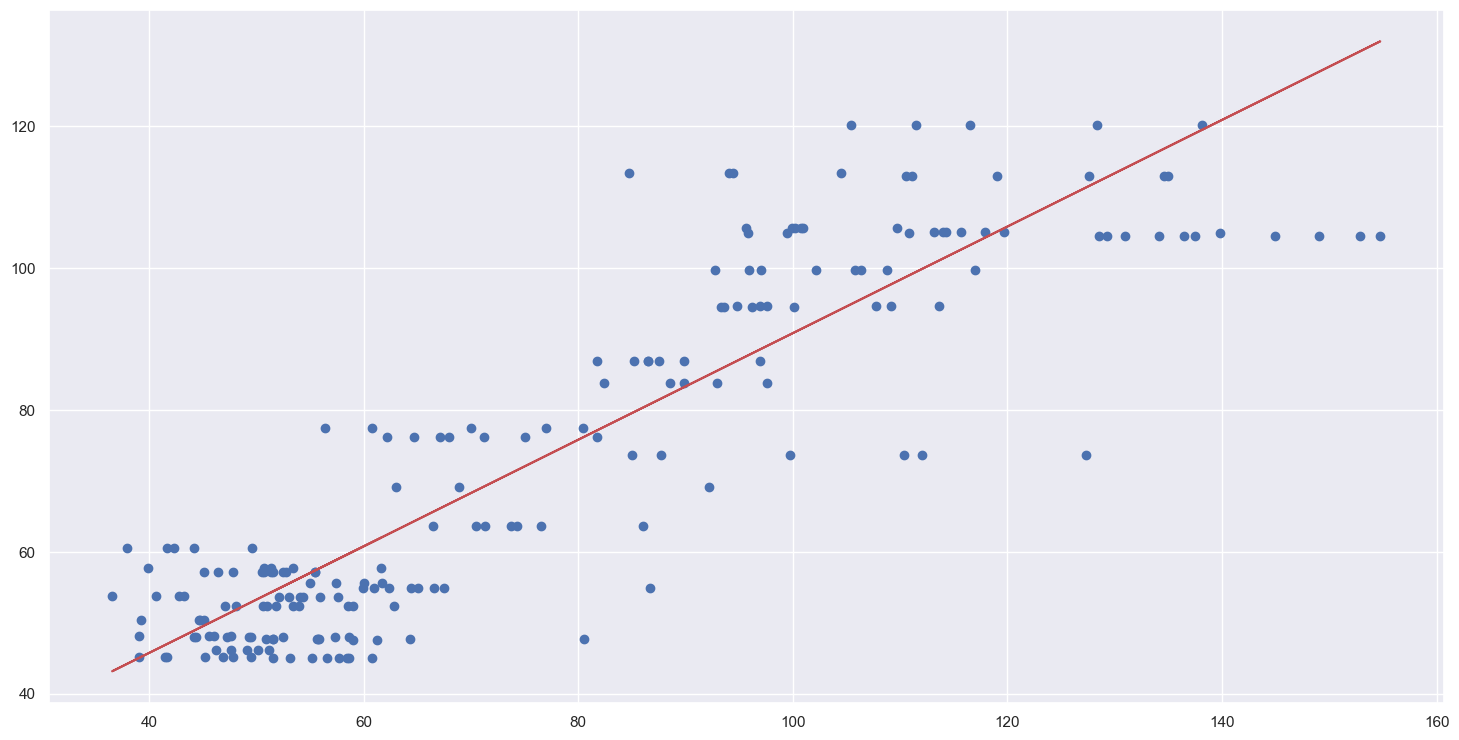

In [108]:
plt.figure(figsize=(18,9))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.show()

In [109]:
linreg.score(x_train,y_train)

0.8045683939079786

In [110]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)

print(f'Test score : {score}')

Test score : 0.7924985669078575


In [111]:
f'Slope : {linreg.coef_}'

'Slope : [[0.75180713]]'

In [112]:
f'Intercept : {linreg.intercept_}'

'Intercept : [15.66058414]'

In [113]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.49082051079554
MSE: 120.36116654560523
RMSE: 10.970923686983026
